**Exploratory Data Ananysis and Data Wrangling**

In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df = df.rename(columns={'y':'subscribed'})

In [5]:
sub_df = df[df['subscribed']=='yes']

In [6]:
sub_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
df.nunique()

age             77
job             12
marital          3
education        4
default          2
balance       7168
housing          2
loan             2
contact          3
day             31
month           12
duration      1573
campaign        48
pdays          559
previous        41
poutcome         4
subscribed       2
dtype: int64

In [9]:
df['subscribed'].value_counts()

no     39922
yes     5289
Name: subscribed, dtype: int64

In [10]:
df.shape

(45211, 17)

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(45211, 17)

In [13]:
non_scaled = df[['age', 'balance', 'duration']]

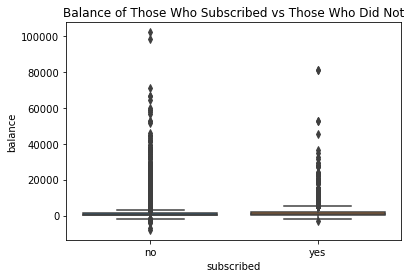

In [14]:
sns.boxplot(x = 'subscribed', y='balance', data=df).set(title='Balance of Those Who Subscribed vs Those Who Did Not')
plt.show()

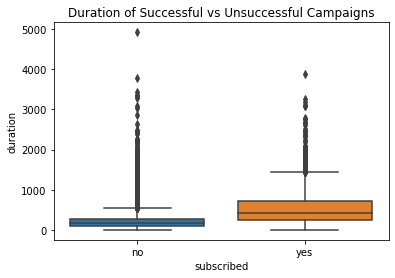

In [15]:
sns.boxplot(x = 'subscribed', y='duration', data=df).set(title='Duration of Successful vs Unsuccessful Campaigns')
plt.show()

In [16]:
age_df = df.groupby('subscribed', as_index=False)['age'].mean()

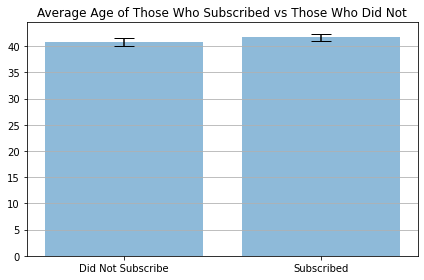

In [17]:
error=0.75
fig, ax = plt.subplots()
ax.bar(age_df['subscribed'], age_df['age'],
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

labels = ['Did Not Subscribe', 'Subscribed']
ax.set_xticks(age_df['subscribed'])
ax.set_xticklabels(labels)
ax.set_title('Average Age of Those Who Subscribed vs Those Who Did Not')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [18]:
subscribed_df = df[df['subscribed']=='yes']
did_not_subscribe_df = df[df['subscribed']=='no']

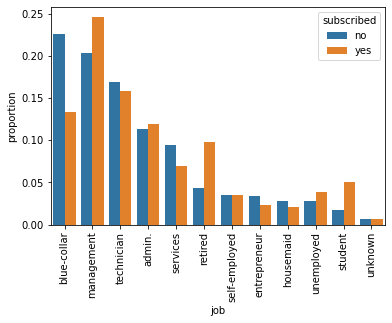

In [19]:
x, y, hue = "job", "proportion", "subscribed"
hue_order = ["yes", "no"]

ax = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.show()

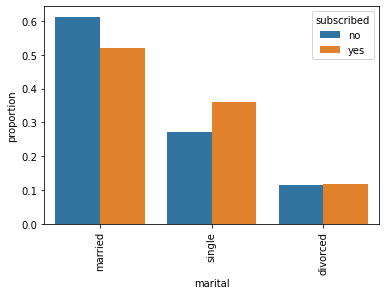

In [20]:
x, y, hue = "marital", "proportion", "subscribed"
hue_order = ["yes", "no"]

ax = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.show()

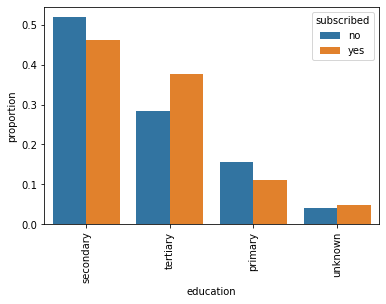

In [21]:
x, y, hue = "education", "proportion", "subscribed"
hue_order = ["yes", "no"]

ax = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.show()

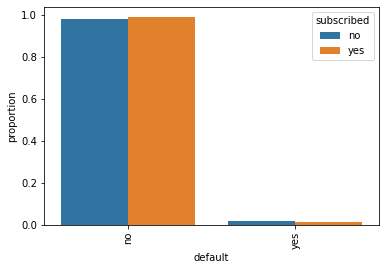

In [22]:
x, y, hue = "default", "proportion", "subscribed"
hue_order = ["yes", "no"]

ax = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.show()

In [23]:
balance_df = df.groupby('subscribed', as_index=False)['balance'].mean()

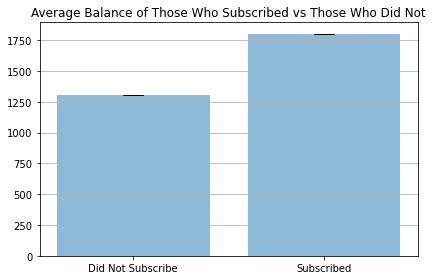

In [24]:
error=0.75
fig, ax = plt.subplots()
ax.bar(balance_df['subscribed'], balance_df['balance'],
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

labels = ['Did Not Subscribe', 'Subscribed']
ax.set_xticks(balance_df['subscribed'])
ax.set_xticklabels(labels)
ax.set_title('Average Balance of Those Who Subscribed vs Those Who Did Not')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

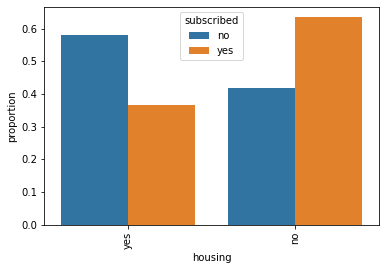

In [25]:
x, y, hue = "housing", "proportion", "subscribed"
hue_order = ["yes", "no"]

ax = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.show()

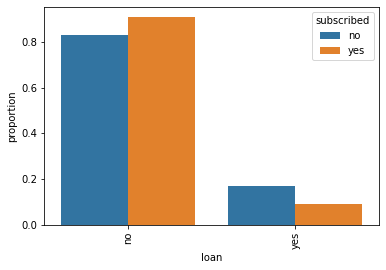

In [26]:
x, y, hue = "loan", "proportion", "subscribed"
hue_order = ["yes", "no"]

ax = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.show()

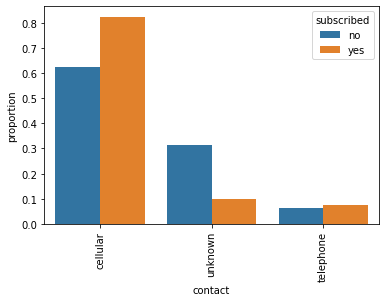

In [27]:
x, y, hue = "contact", "proportion", "subscribed"
hue_order = ["yes", "no"]

ax = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.show()

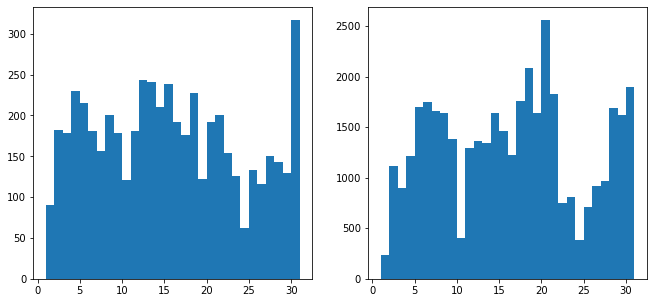

In [28]:
fig, ax =plt.subplots(1,2, figsize=(11, 5))
ax1 = subscribed_df['day'].hist(bins=30, grid=False, ax=ax[0])
ax2 = did_not_subscribe_df['day'].hist(bins=30, grid=False, ax=ax[1])

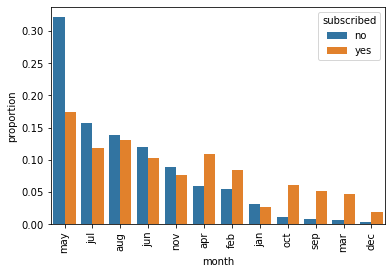

In [29]:
x, y, hue = "month", "proportion", "subscribed"
hue_order = ["yes", "no"]

ax = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.show()

In [30]:
duration_df = df.groupby('subscribed', as_index=False)['duration'].mean()

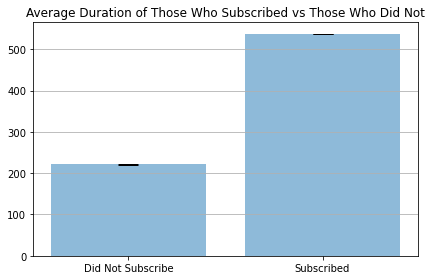

In [31]:
error=0.75
fig, ax = plt.subplots()
ax.bar(duration_df['subscribed'], duration_df['duration'],
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

labels = ['Did Not Subscribe', 'Subscribed']
ax.set_xticks(balance_df['subscribed'])
ax.set_xticklabels(labels)
ax.set_title('Average Duration of Those Who Subscribed vs Those Who Did Not')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

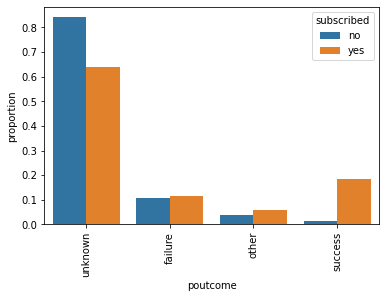

In [32]:
x, y, hue = "poutcome", "proportion", "subscribed"
hue_order = ["yes", "no"]

ax = (df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

for tick in ax.get_xticklabels():
    tick.set_rotation(90)
    
plt.show()

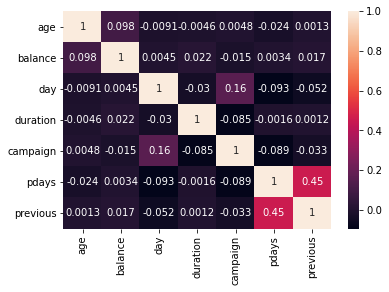

In [33]:
correlation_mat = df.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

**Scale Continuous Variables**

In [34]:
dummy_df = pd.get_dummies(df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])
dummy_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [35]:
df['subscribed'] = df.subscribed.map(dict(yes=1, no=0))

In [36]:
df = pd.concat([non_scaled, dummy_df, df['subscribed']], axis=1)
list(df.columns)

['age',
 'balance',
 'duration',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'subscribed']

In [37]:
df.head()

,age,balance,duration,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,subscribed
0,58,2143,261,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,151,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,76,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,92,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,198,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [38]:
Xtrain = df.drop(columns='subscribed')
Xtrain = sm.add_constant(Xtrain)
ytrain = df['subscribed']

log_reg = sm.Logit(ytrain, Xtrain).fit() 

         Current function value: 0.239601
         Iterations: 35


C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [39]:
log_reg.summary()

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             subscribed   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45172
Method:                           MLE   Df Model:                           38
Date:                Wed, 27 Jan 2021   Pseudo R-squ.:                  0.3361
Time:                        15:20:20   Log-Likelihood:                -10833.
converged:                      False   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.9233   1.29e+06   7.14e-07      1.000   -2.54e+06    2.54e+06
age                  7.288e-05      0.002      0.033      0.974      -0.004       0.004
balance              1.291e-05   5.11e-06      2.526      0.012     2.9e-06    2.29e-05
duration                0.0042   6.42e-05     65.101      0.000       0.004       0.004
job_admin.             -1.6389   7.25e+06  -2.26e-07      1.000   -1.42e+07    1.42e+07
job_blue-collar        -1.9526   7.32e+06  -2.67e-07      1.000   -1.43e+07    1.43e+07
job_entrepreneur       -2.0107   7.51e+06  -2.68e-07      1.000   -1.47e+07    1.47e+07
job_housemaid          -2.1295   7.19e+06  -2.96e-07      1.000   -1.41e+07    1.41e+07
job_management         -1.8062   6.54e+06  -2.76e-07      1.000   -1.28e+07    1.28e+07
job_retired            -1.3543   7.45e+06  -1.82e-07      1.000   -1.46e+07    1.46e+07
job_self-employed      -1.9433   7.23e+06  -2.69e-07      1.000   -1.42e+07    1.42e+07
job_services           -1.8684      7e+06  -2.67e-07      1.000   -1.37e+07    1.37e+07
job_student            -1.2510   6.42e+06  -1.95e-07      1.000   -1.26e+07    1.26e+07
job_technician         -1.8113   7.14e+06  -2.54e-07      1.000    -1.4e+07     1.4e+07
job_unemployed         -1.8056   7.34e+06  -2.46e-07      1.000   -1.44e+07    1.44e+07
job_unknown            -1.9824    7.4e+06  -2.68e-07      1.000   -1.45e+07    1.45e+07
marital_divorced       -0.2373        nan        nan        nan         nan         nan
marital_married        -0.4245        nan        nan        nan         nan         nan
marital_single         -0.1439        nan        nan        nan         nan         nan
education_primary      -0.4103   1.42e+06   -2.9e-07      1.000   -2.78e+06    2.78e+06
education_secondary    -0.2210   1.54e+06  -1.44e-07      1.000   -3.01e+06    3.01e+06
education_tertiary     -0.0247   1.55e+06  -1.59e-08      1.000   -3.04e+06    3.04e+06
education_unknown      -0.1498   1.78e+06  -8.41e-08      1.000   -3.49e+06    3.49e+06
default_no             -0.3910        nan        nan        nan         nan         nan
default_yes            -0.4147        nan        nan        nan         nan         nan
housing_no             -0.0557   3.79e+06  -1.47e-08      1.000   -7.42e+06    7.42e+06
housing_yes            -0.7500   3.48e+06  -2.15e-07      1.000   -6.83e+06    6.83e+06
loan_no                -0.1888        nan        nan        nan         nan         nan
loan_yes               -0.6170        nan        nan        nan         nan         nan
contact_cellular        0.3425   7.14e+05    4.8e-07      1.000    -1.4e+06     1.4e+06
contact_telephone       0.1225   6.94e+05   1.76e-07      1.000   -1.36e+06    1.36e+06
contact_unknown        -1.2707   6.37e+05     -2e-06      1.000   -1.25e+06    1.25e+06
month_apr              -0.0329    2.2e+06   -1.5e-08      1.000    -4.3e+06     4.3e+06
month_aug              -0.8887   2.08e+06  -4.27e-07      1.000   -4.08e+

In [40]:
num_vars = df[['age', 'balance', 'duration']]

In [41]:
scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(num_vars))

In [42]:
X_train.columns = ['age_scaled', 'balance_scaled', 'duration_scaled']

In [43]:
X_train

,age_scaled,balance_scaled,duration_scaled
0,1.266667,1.250000,0.375000
1,0.333333,-0.308997,-0.134259
2,-0.400000,-0.328909,-0.481481
3,0.533333,0.780236,-0.407407
4,-0.400000,-0.329646,0.083333
...,...,...,...
45206,0.800000,0.278024,3.689815
45207,2.133333,0.944690,1.277778
45208,2.200000,3.884218,4.384259
45209,1.200000,0.162242,1.518519


In [44]:
df = pd.concat([df, X_train], axis = 1)

In [45]:
df = df.drop(columns = ['age', 'duration', 'balance'])

In [46]:
df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,subscribed,age_scaled,balance_scaled,duration_scaled
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1.266667,1.250000,0.375000
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0.333333,-0.308997,-0.134259
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-0.400000,-0.328909,-0.481481
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.533333,0.780236,-0.407407
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,-0.400000,-0.329646,0.083333


In [47]:
X, y = df.drop(columns='subscribed'), df['subscribed']

In [48]:
lr = LogisticRegression()
lr.fit(X, y)
importance = lr.coef_[0]

for (i,v),c in zip(enumerate(importance), X.columns):
    print(f'{c}, Score: %.5f' % (v))

job_admin., Score: 0.14263
job_blue-collar, Score: -0.17322
job_entrepreneur, Score: -0.23127
job_housemaid, Score: -0.32313
job_management, Score: -0.02473
job_retired, Score: 0.43145
job_self-employed, Score: -0.15543
job_services, Score: -0.09192
job_student, Score: 0.53589
job_technician, Score: -0.02839
job_unemployed, Score: -0.01653
job_unknown, Score: -0.22049
marital_divorced, Score: -0.02266
marital_married, Score: -0.20750
marital_single, Score: 0.07504
education_primary, Score: -0.24985
education_secondary, Score: -0.05653
education_tertiary, Score: 0.13833
education_unknown, Score: 0.01293
default_no, Score: -0.06728
default_yes, Score: -0.08784
housing_no, Score: 0.26823
housing_yes, Score: -0.42336
loan_no, Score: 0.13799
loan_yes, Score: -0.29311
contact_cellular, Score: 0.55844
contact_telephone, Score: 0.33465
contact_unknown, Score: -1.04822
month_apr, Score: 0.02945
month_aug, Score: -0.82989
month_dec, Score: 0.63934
month_feb, Score: -0.26128
month_jan, Score: -1.

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [49]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X,y)
importances = rf.feature_importances_

for (i,v),c in zip(enumerate(importances), X.columns):
    print(f'{c}, Score: %.5f' % (v))

job_admin., Score: 0.00000
job_blue-collar, Score: 0.00437
job_entrepreneur, Score: 0.00000
job_housemaid, Score: 0.00000
job_management, Score: 0.00000
job_retired, Score: 0.00706
job_self-employed, Score: 0.00000
job_services, Score: 0.00000
job_student, Score: 0.00149
job_technician, Score: 0.00006
job_unemployed, Score: 0.00000
job_unknown, Score: 0.00018
marital_divorced, Score: 0.00001
marital_married, Score: 0.00271
marital_single, Score: 0.00442
education_primary, Score: 0.00000
education_secondary, Score: 0.00080
education_tertiary, Score: 0.00025
education_unknown, Score: 0.00011
default_no, Score: 0.00004
default_yes, Score: 0.00058
housing_no, Score: 0.04471
housing_yes, Score: 0.07119
loan_no, Score: 0.00356
loan_yes, Score: 0.00459
contact_cellular, Score: 0.02437
contact_telephone, Score: 0.00166
contact_unknown, Score: 0.05682
month_apr, Score: 0.00217
month_aug, Score: 0.00035
month_dec, Score: 0.00969
month_feb, Score: 0.00072
month_jan, Score: 0.00007
month_jul, Scor

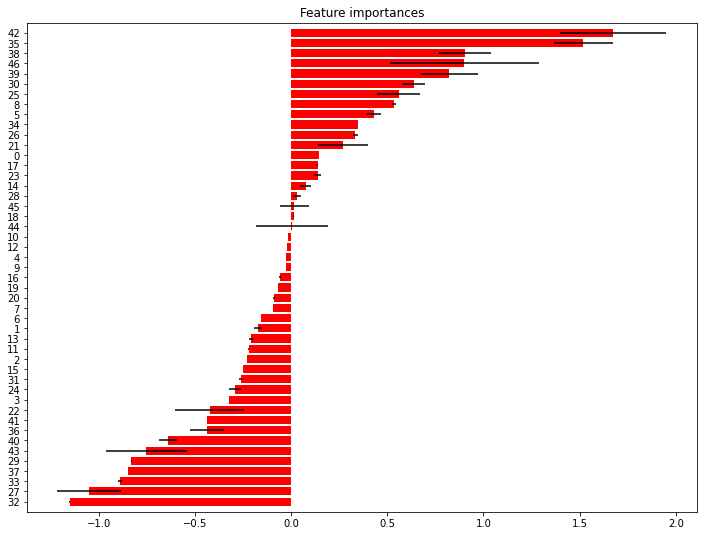

<Figure size 648x648 with 0 Axes>

In [66]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

indices = np.argsort(importance)

# Plot the feature importances of the forest
plt.figure(figsize=(12,9))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importance[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X.shape[1]), indices, rotation = 'horizontal')
plt.ylim([-1, X.shape[1]])
plt.figure(figsize=(9, 9))
plt.show()

In [99]:
indices_l = list(indices)

In [102]:
l = [i for i in X.columns]
enum = enumerate(l)
d=dict((i,j) for i,j in enum)
ticks = []
for k, v in d:
    if k in indices_l:
        ticks.append(v)

TypeError: 'int' object is not iterable

In [110]:
ticks = []
for k, v in d.items():
    if k in indices_l:
        ticks.append(v)
ticks

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_no',
 'default_yes',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown',
 'age_scaled',
 'balance_scaled',
 'duration_scaled']